In [1]:
from select import select
from odps import ODPS
from odps import options
from odps.df import DataFrame
import pandas as pd
import numpy as np
import re
import math
from collections import Counter
from collections import defaultdict

ACCESS_ID = 'LTAI5t9uwJrh5eJ7Q5E37D1s'
SECRET_ACCESS_KEY = 'NCFHOAnvqfnTrpypgR4b3cNawP8fnB'
ODPS_PROJECT = 'OpenDigger_prod_dev'
ODPS_ENDPOINT = 'http://service.cn-shanghai.maxcompute.aliyun.com/api'
# ACCESS_ID = 'LTAI5tSjrYp6JDW2bbiTdegU'
# SECRET_ACCESS_KEY = 'OE6JbSqOZUey5fzr9Wg6fuYYKvslZx'
# 创建odps实例
o = ODPS(ACCESS_ID, SECRET_ACCESS_KEY,
         project=ODPS_PROJECT, endpoint=ODPS_ENDPOINT)
options.tunnel.limit_instance_tunnel = False
# options.read_timeout = 3600000

users = DataFrame(o.get_table('ods_github_users'))
print(users.dtypes)

github_log = DataFrame(o.get_table('ods_github_log'))
print(github_log.dtypes)

ODPSError: AccessKeyIdNotFound: RequestId: 62936AF84C2938DEF307C61A
ODPS-0410051:Invalid credentials - accessKeyId not found: LTAI5t9uwJrh5eJ7Q5E37D1s

In [2]:
def exe_sql(sql):
    data = []
    with o.execute_sql(sql).open_reader() as reader:
        d = defaultdict(list)  
        for record in reader:
            for res in record:
                d[res[0]].append(res[1])  
        data = pd.DataFrame.from_dict(d,orient='index').T 
    return data

rdata =  exe_sql("SELECT * FROM ods_github_users;")


In [3]:
rdata

,login,created_at,database_id,location,company,bio,is_employee,email,infoname,followers,following,time,name,lastupdatedat,nextupdateat
0,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-11-22,LombiqBot,2022-01-25,2022-02-24
1,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-12-23,LombiqBot,2022-01-25,2022-02-24
2,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2022-01-25,LombiqBot,2022-01-25,2022-02-24
3,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-11-18,direwolf-github,2022-01-20,2022-02-19
4,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-12-20,direwolf-github,2022-01-20,2022-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618237,Enjay27,2016-11-08,23338687,Korea,None,Web Developer / \r\nKeen on learning and tryin...,False,,Noah,"48577694,72131649,42285463,72012602,59365947,6...","48577694,60544994,72131649,6083678,42285463,72...",2022-01-29,Enjay27,2022-01-29,2022-02-28
618238,denllx,2018-08-14,42374096,None,None,,False,,Higari,"93073000,38338565,18473413,48854566,32595111,2...","31069308,22500116,38338565,18473413,48854566,3...",2022-01-30,denllx,2022-01-30,2022-03-01
618239,bkiscool,2017-11-23,33919755,None,None,,False,,bk,79547580,"79547580,6016498",2022-02-02,bkiscool,2022-02-02,2022-03-04
618240,NguyenLeTienTrien,2021-09-04,90084675,Vietnam,None,,False,,Nguyễn Lê Tiến Triển,None,None,2022-01-31,NguyenLeTienTrien,2022-01-31,2022-03-02


In [3]:
followers_data = np.array(rdata[['followers']])
followings_data = np.array(rdata[['following']])

In [4]:
def count_num(data):
    num = []
    for i in range(618242):
        list_data = str(data[i]).strip('][')
        list_data = list_data.strip("'")
        list_data = list_data.split(',')
        if list_data == ['None']:
            num.append(0)
        else:
            num.append(len(list_data))
    return num

In [5]:
followers_num = count_num(followers_data)
followers_count = Counter(followers_num)

followings_num = count_num(followings_data)
followings_count = Counter(followings_num)

In [7]:
follower_dataframe = pd.DataFrame.from_dict(followers_count,orient='index').reset_index()
follower_dataframe = follower_dataframe.sort_index(axis=0, by='index', ascending=True) 

following_dataframe = pd.DataFrame.from_dict(followings_count,orient='index').reset_index()
following_dataframe = following_dataframe.sort_index(axis=0, by='index', ascending=True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


In [8]:
x1 = follower_dataframe['index']
y1 = follower_dataframe[0]

x2 = following_dataframe['index']
y2 = following_dataframe[0]

x1 = x1 + 1
x2 = x2 + 1

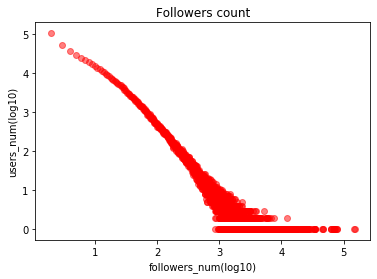

In [10]:
import matplotlib.pyplot as plt
colors1 = 'r' 
plt.scatter(np.log10(x1+1), np.log10(y1),  c=colors1, alpha=0.5, label='a')
plt.xlabel('followers_num(log10)')
plt.ylabel('users_num(log10)')
plt.title('Followers count')
plt.show()

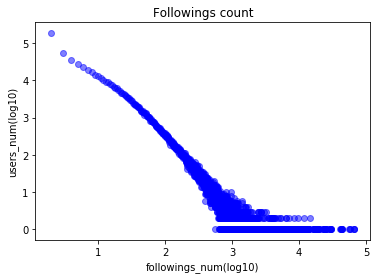

In [11]:
import matplotlib.pyplot as plt
colors1 = 'b' 
plt.scatter(np.log10(x2+1), np.log10(y2),  c=colors1, alpha=0.5, label='a')
plt.xlabel('followings_num(log10)')
plt.ylabel('users_num(log10)')
plt.title('Followings count')
plt.show()

In [12]:
follow_dataframe = {'followers':followers_num, 'followings':followings_num}
follow_dataframe = pd.DataFrame(follow_dataframe)
follow_dataframe = follow_dataframe.sort_index(axis=0, ascending=True) 

In [13]:
x3 = follow_dataframe['followers'] 
y3 = follow_dataframe['followings'] 

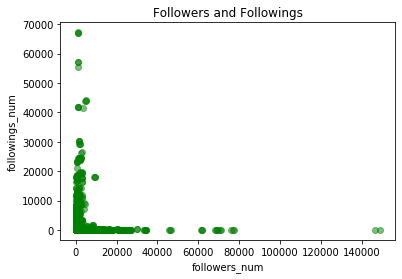

In [14]:
import matplotlib.pyplot as plt
colors1 = 'g' 
plt.scatter(x3, y3,  c=colors1, alpha=0.5, label='a')
plt.xlabel('followers_num')
plt.ylabel('followings_num')
plt.title('Followers and Followings')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


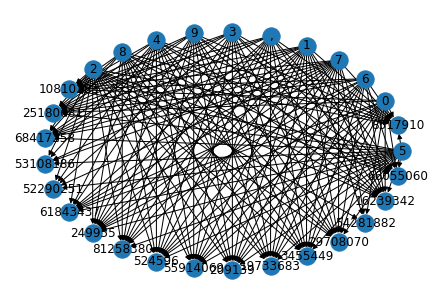

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
data = rdata.dropna(axis='index', how='all', subset=['followers'])
G = nx.DiGraph()

#取前50个点
cnt = 0
for index, row in data.iterrows():
    for follower in row['followers']:
        G.add_edge(follower, row['database_id'])
    cnt += 1
    if cnt == 50:
        break
        

layout = nx.shell_layout(G)
# nx.draw(G, pos=layout, with_labels=True, hold=False)
nx.draw(G, pos=layout, with_labels=True)
plt.show()